In [43]:
# load some data to practice regressions
import seaborn as sns
import numpy as np
diamonds = sns.load_dataset('diamonds')

# this alteration is not strictly necessary to practice a regression
# but we use this in livecoding
diamonds2 = (diamonds.query('carat < 2.5')               # censor/remove outliers
            .assign(lprice = np.log(diamonds['price']))  # log transform price
            .assign(lcarat = np.log(diamonds['carat']))  # log transform carats
            .assign(ideal = diamonds['cut'] == 'Ideal') 
             
             # some regression packages want you to explicitly provide 
             # a variable for the constant
            .assign(const = 1)                           
            )  

In [44]:
diamonds2['ideal'].value_counts()

False    32273
True     21524
Name: ideal, dtype: int64

                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 7.542e+05
Date:                Thu, 26 Mar 2020   Prob (F-statistic):               0.00
Time:                        12:07:43   Log-Likelihood:                -4073.2
No. Observations:               53797   AIC:                             8150.
Df Residuals:                   53795   BIC:                             8168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.4525      0.001   6193.432      0.0

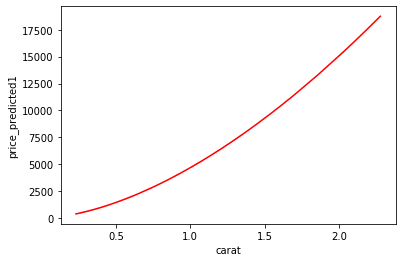

In [45]:
import statsmodels.api as sm  

y = diamonds2['lprice']
X = diamonds2[['const','lcarat']]

model1 = sm.OLS(y,X)                # pick model type and specify model features
results1 = model1.fit()             # estimate / fit
print(results1.summary())           # view results 
y_predicted1 = results1.predict()   # get the predicted results
residuals1 = results1.resid         # get the residuals
#residuals1 = y - y_predicted1      # another way to get the residuals

diamonds2['lprice_predicted1'] = results1.predict()
diamonds2['residuals1'] = results1.resid

diamonds2['price_predicted1'] = np.exp(diamonds2['lprice_predicted1'])

sns.lineplot(data=diamonds2.sample(700),x='carat',y='price_predicted1',color='red')

,carat,depth,table,price,x,y,z,lprice,lcarat,const,lprice_predicted1,residuals1,price_predicted1
count,53790.000000,53790.000000,53790.000000,53790.000000,53790.000000,53790.000000,53790.000000,53790.000000,53790.000000,53790.0,53790.000000,53790.000000,53790.000000
mean,0.792706,61.747302,57.455038,3902.795166,5.722655,5.726193,3.533456,7.781905,-0.398713,1.0,7.781903,0.000002,3771.262174
std,0.463139,1.429321,2.233615,3948.688790,1.110945,1.132063,0.698664,1.011622,0.581096,0.0,0.977366,0.261019,3700.261001
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,5.786897,-1.609438,1.0,5.745541,-1.361775,312.792742
25%,0.400000,61.000000,56.000000,947.250000,4.710000,4.720000,2.910000,6.853563,-0.916291,1.0,6.911370,-0.170112,1003.621032
50%,0.700000,61.800000,57.000000,2395.000000,5.690000,5.710000,3.520000,7.781139,-0.356675,1.0,7.852608,-0.006029,2572.433260
75%,1.040000,62.500000,59.000000,5292.000000,6.540000,6.530000,4.030000,8.573952,0.039221,1.0,8.518479,0.165904,5006.430921
max,2.490000,79.000000,95.000000,18823.000000,8.890000,58.900000,31.800000,9.842835,0.912283,1.0,9.986913,1.341449,21740.076097


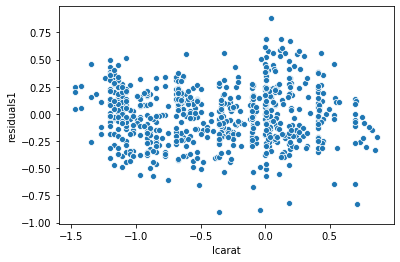

In [46]:
sns.scatterplot(data=diamonds2.sample(700),x='lcarat',y='residuals1')

diamonds2.iloc[:-7:].describe()

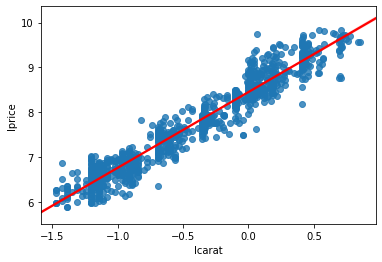

In [47]:
# taking logs helps you model non linear relationship, reduce outliers, normalize distr that aren't normal
sns.regplot(data=diamonds2.sample(1000),x='lcarat',y='lprice',line_kws={'color':'red'})

## mystery

In [48]:
# fair vs ideal diamonds

## Don's fave regression

In [49]:
from statsmodels.formula.api import ols as sm_ols

# sm_ols(y_var TILDE any x_vars you want)
model2   = sm_ols('lprice ~ lcarat',  # specify model (you don't need to include the constant!)
                  data=diamonds2)
results2 = model2.fit()               # estimate / fit
print(results2.summary())             # view results ... identical to before

# the prediction and residual and plotting are the exact same

                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 7.542e+05
Date:                Thu, 26 Mar 2020   Prob (F-statistic):               0.00
Time:                        12:07:48   Log-Likelihood:                -4073.2
No. Observations:               53797   AIC:                             8150.
Df Residuals:                   53795   BIC:                             8168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.4525      0.001   6193.432      0.0

In [50]:
sm_ols('lprice ~ lcarat + ideal', data=diamonds2).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lprice   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 3.914e+05
Date:                Thu, 26 Mar 2020   Prob (F-statistic):               0.00
Time:                        12:07:50   Log-Likelihood:                -3136.4
No. Observations:               53797   AIC:                             6279.
Df Residuals:                   53794   BIC:                             6306.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.4182      0.002   5415.779      0.000       8.415       8.421
ideal[T.True]     0.1000      0.002     43.662      0.000       0.096       0.105
lcarat            1.6963      0.002    878.286      0.000       1.692       1.700
==============================================================================
Omnibus:                      794.680   Durbin-Watson:                   1.241
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1394.941
Skew:                           0.101   Prob(JB):                    1.24e-303
Kurtosis:                       3.763   Cond. No.                         2.67
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**can just do it like this though:**

In [51]:
# new one
sm_ols('lprice ~ lcarat + ideal', data=diamonds2).fit().summary()
# interpretation of 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lprice   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 3.914e+05
Date:                Thu, 26 Mar 2020   Prob (F-statistic):               0.00
Time:                        12:07:51   Log-Likelihood:                -3136.4
No. Observations:               53797   AIC:                             6279.
Df Residuals:                   53794   BIC:                             6306.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.4182      0.002   5415.779      0.000       8.415       8.421
ideal[T.True]     0.1000      0.002     43.662      0.000       0.096       0.105
lcarat            1.6963      0.002    878.286      0.000       1.692       1.700
==============================================================================
Omnibus:                      794.680   Durbin-Watson:                   1.241
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1394.941
Skew:                           0.101   Prob(JB):                    1.24e-303
Kurtosis:                       3.763   Cond. No.                         2.67
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
print(.5*249-.1*75)
print(.5*340-.1*76)

117.0
162.4


### categorical variables!

In [53]:
sm_ols('lprice ~ lcarat + cut', data=diamonds2).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lprice   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                 1.613e+05
Date:                Thu, 26 Mar 2020   Prob (F-statistic):               0.00
Time:                        12:07:54   Log-Likelihood:                -2389.9
No. Observations:               53797   AIC:                             4792.
Df Residuals:                   53791   BIC:                             4845.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            8.2097      0.006   1290.380      0.000       8.197       8.222
cut[T.Good]          0.1568      0.007     21.392      0.000       0.142       0.171
cut[T.Ideal]         0.3111      0.007     46.838      0.000       0.298       0.324
cut[T.Premium]       0.2321      0.007     34.501      0.000       0.219       0.245
cut[T.Very Good]     0.2341      0.007     34.486      0.000       0.221       0.247
lcarat               1.7014      0.002    889.548      0.000       1.698       1.705
==============================================================================
Omnibus:                      792.280   Durbin-Watson:                   1.261
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1178.654
Skew:                           0.168   Prob(JB):                    1.14e-256
Kurtosis:                       3.643   Cond. No.                         16.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
diamonds2.groupby('cut')['lprice'].mean() # avg lprice by cut

cut
Fair         8.068832
Good         7.836076
Ideal        7.636921
Premium      7.944690
Very Good    7.795675
Name: lprice, dtype: float64

## read lecture page

In [55]:
# diamonds2 x variable goes up by 1%, how much does price go up by
sm_ols('price~x',data=diamonds2).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                 1.899e+05
Date:                Thu, 26 Mar 2020   Prob (F-statistic):               0.00
Time:                        12:09:35   Log-Likelihood:            -4.8120e+05
No. Observations:               53797   AIC:                         9.624e+05
Df Residuals:                   53795   BIC:                         9.624e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.405e+04     41.976   -334.776      0.000   -1.41e+04    -1.4e+04
x           3137.5607      7.201    435.734      0.000    3123.447    3151.674
==============================================================================
Omnibus:                    19264.496   Durbin-Watson:                   0.420
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           149991.817
Skew:                           1.516   Prob(JB):                         0.00
Kurtosis:                      10.598   Cond. No.                         31.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""